### Importing the librairies

In [1]:
from ultralytics import YOLO
import shutil
import os
from random import choice
import cv2
import matplotlib.pyplot as plt

### Preparing the traffic sign dataset

In [2]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
crs_path = "./raw_dataset"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)
print("total images are : ",len(imgs))

training images are :  592
validation images are :  148
total images are :  741


In [3]:
train_image_path = "./dataset/images/train"
train_label_path = "./dataset/labels/train"
val_image_path = "./dataset/images/val"
val_label_path = "./dataset/labels/val"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)
    
# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))

### Training the YoloV8 model on custom traffic signs dataset

In [4]:
# load model.pt
model = YOLO(model="model.pt")

In [5]:
# Train using gpu
model.train(data='./dataset/dataset.yaml', epochs=3)
metrics = model.val()

Ultralytics YOLOv8.1.16 🚀 Python-3.11.2 torch-2.0.1+cpu CPU (AMD Ryzen 5 3600XT 6-Core Processor)
engine\trainer: task=detect, mode=train, model=model.pt, data=./dataset/dataset.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: dyrudis (dyrurids). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'


train: Scanning C:\Users\Dyrudis\Desktop\Traffic sign recognition\dataset\labels\train.cache... 741 images, 0 backgrounds, 0 corrupt: 100%|██████████| 741/741 [00:00<?, ?it/s]

train: WARNING ⚠️ C:\Users\Dyrudis\Desktop\Traffic sign recognition\dataset\images\train\00340.jpg: 1 duplicate labels removed



val: Scanning C:\Users\Dyrudis\Desktop\Traffic sign recognition\dataset\labels\val... 661 images, 0 backgrounds, 0 corrupt: 100%|██████████| 661/661 [00:00<00:00, 1588.48it/s]

val: WARNING ⚠️ C:\Users\Dyrudis\Desktop\Traffic sign recognition\dataset\images\val\00340.jpg: 1 duplicate labels removed


val: New cache created: C:\Users\Dyrudis\Desktop\Traffic sign recognition\dataset\labels\val.cache
Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.286      4.043     0.9075         10        640: 100%|██████████| 47/47 [04:09<00:00,  5.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:59<00:00,  2.84s/it]

                   all        661       1091    0.00208      0.279      0.196      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.145      2.304     0.8617         13        640: 100%|██████████| 47/47 [04:00<00:00,  5.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [01:02<00:00,  2.96s/it]

                   all        661       1091      0.951      0.394      0.718      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.019      1.871      0.853         13        640: 100%|██████████| 47/47 [03:57<00:00,  5.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:59<00:00,  2.84s/it]

                   all        661       1091      0.888      0.723      0.833      0.601



3 epochs completed in 0.254 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 6.2MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics YOLOv8.1.16 🚀 Python-3.11.2 torch-2.0.1+cpu CPU (AMD Ryzen 5 3600XT 6-Core Processor)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:52<00:00,  2.49s/it]


                   all        661       1091      0.888      0.723      0.833      0.601
           speed limit        661        505      0.911      0.828      0.911      0.661
                 yield        661        193      0.911      0.793       0.89       0.66
             mandatory        661        148      0.967      0.596      0.761      0.538
                 other        661        245      0.764      0.673      0.768      0.547
Speed: 1.0ms preprocess, 61.1ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs\detect\train5


lr/pg0,▁█▂
lr/pg1,▁█▂
lr/pg2,▁█▂
metrics/mAP50(B),▁▇█
metrics/mAP50-95(B),▁▆█
metrics/precision(B),▁██
metrics/recall(B),▁▃█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▄▁


Ultralytics YOLOv8.1.16 🚀 Python-3.11.2 torch-2.0.1+cpu CPU (AMD Ryzen 5 3600XT 6-Core Processor)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\Dyrudis\Desktop\Traffic sign recognition\dataset\labels\val.cache... 661 images, 0 backgrounds, 0 corrupt: 100%|██████████| 661/661 [00:00<?, ?it/s]

val: WARNING ⚠️ C:\Users\Dyrudis\Desktop\Traffic sign recognition\dataset\images\val\00340.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:58<00:00,  1.38s/it]


                   all        661       1091      0.888      0.723      0.833      0.601
           speed limit        661        505      0.911      0.828      0.911      0.661
                 yield        661        193      0.911      0.793       0.89       0.66
             mandatory        661        148      0.967      0.596      0.761      0.538
                 other        661        245      0.764      0.673      0.768      0.547
Speed: 1.1ms preprocess, 67.8ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs\detect\train52


In [6]:
# Save the model as "model.pt"
model.save("model.pt")

### Test the model on new traffic signs

In [7]:
# Run batched inference on a list of images
results = model(['./dataset/images/val/00001.jpg',
                  './dataset/images/val/00006.jpg',
                  './dataset/images/val/00008.jpg'])

# Process results list
for i, result in enumerate(results):
    result.save(filename='result_'+str(i)+'.jpg')  # save to disk


0: 384x640 2 mandatorys, 1 other, 1: 384x640 1 speed limit, 2: 384x640 1 speed limit, 1 other, 257.4ms
Speed: 2.7ms preprocess, 85.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


### Display the images

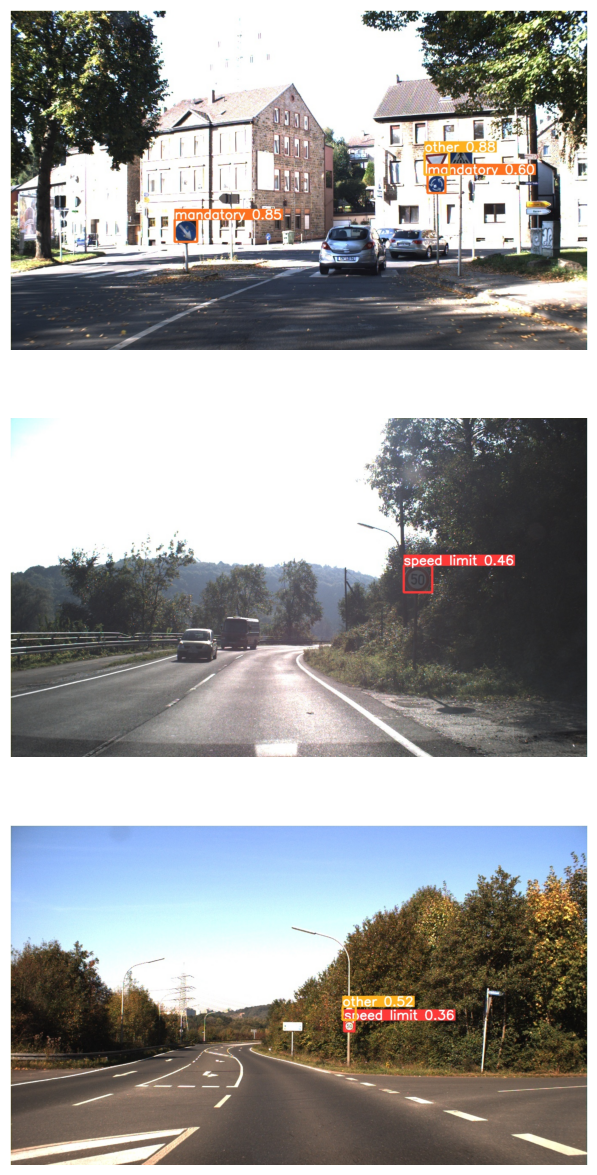

In [2]:
image1 = cv2.imread("result_0.jpg")
image2 = cv2.imread("result_1.jpg")
image3 = cv2.imread("result_2.jpg")

fig, ax = plt.subplots(3, 1, figsize=(15, 15))
ax[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
for ax in ax:
    ax.axis('off')
plt.show()